### part4 - clustering - Hierarchical Clustering

### Hierarchical_Clustering intuition

- Same as K-Means but different process

모르는 단어가 등장해서....
- agglomerative : 덩어리가 되는, 응집하는
  - bottom up approach method
- divisive : 구별을 짓는, 분열을 초래하는
- dendrograms : https://en.wikipedia.org/wiki/Dendrogram
- ratsgo 님의 설명 : https://ratsgo.github.io/machine%20learning/2017/04/18/HC/

### lecture note

![alt text](Hierarchical_Clustering_1.png)
![alt text](Hierarchical_Clustering_2.png)
![alt text](Hierarchical_Clustering_3.png)
![alt text](Hierarchical_Clustering_4.png)
![alt text](Hierarchical_Clustering_5.png)
![alt text](Hierarchical_Clustering_6.png)
![alt text](Hierarchical_Clustering_7.png)

![alt text](Hierarchical_Clustering_8.png)
![alt text](Hierarchical_Clustering_9.png)
![alt text](Hierarchical_Clustering_10.png)
![alt text](Hierarchical_Clustering_11.png)
![alt text](Hierarchical_Clustering_12.png)


![alt text](Hierarchical_Clustering_14.png)
![alt text](Hierarchical_Clustering_15.png)
![alt text](Hierarchical_Clustering_16.png)
![alt text](Hierarchical_Clustering_17.png)

### code

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

In [5]:
# Importing the mall dataset with pandas

dataset = pd.read_csv("Mall_Customers.csv")
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
X = dataset.iloc[:, [3, 4]].values
X[0:2]

array([[15, 39],
       [15, 81]])

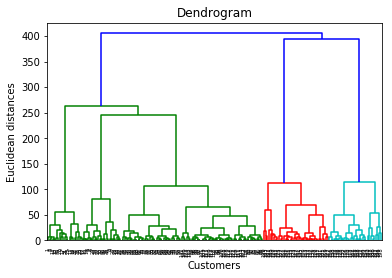

In [13]:
# using the dendrogram to find the optimal number of clusters
# linkage is h~~algorithm
# ward? minimize cluster variance

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = "ward"))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean distances")
plt.show()

In [16]:
# Fitting hierarchical clustering to the mall dataset

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(
    n_clusters = 5, 
    affinity = 'euclidean', 
    linkage = 'ward'
)
y_hc = hc.fit_predict(X)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

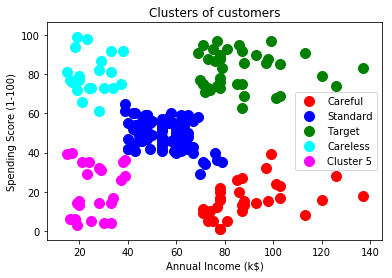

In [18]:
# visualising the clusters

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()